In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
df=pd.read_csv("C:/Users/Rocio/Desktop/ROCÍO/Todo_rocío/Curso_Data_Analyst/Codes/temario/temario/Informe2-Upgrade/calendar.csv", on_bad_lines='skip') ##ignora las líneas problemáticas

In [9]:
df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,97945,2024-12-27,f,$95.00,NaN,2,90
1,97945,2024-12-28,f,$95.00,NaN,2,90
2,97945,2024-12-29,f,$95.00,NaN,2,90
3,97945,2024-12-30,t,$95.00,NaN,2,90
4,97945,2024-12-31,t,$95.00,NaN,2,90


In [10]:
df.tail()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
2657220,1319650217063619527,2025-12-22,t,$300.00,NaN,1,365
2657221,1319650217063619527,2025-12-23,t,$300.00,NaN,1,365
2657222,1319650217063619527,2025-12-24,t,$300.00,NaN,1,365
2657223,1319650217063619527,2025-12-25,t,$300.00,NaN,1,365
2657224,1319650217063619527,2025-12-26,t,$300.00,NaN,1,365


In [11]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 2657225
Number of columns: 7


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2657225 entries, 0 to 2657224
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  float64
 5   minimum_nights  int64  
 6   maximum_nights  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 141.9+ MB


In [13]:
df.dtypes

listing_id          int64
date               object
available          object
price              object
adjusted_price    float64
minimum_nights      int64
maximum_nights      int64
dtype: object

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.isna().any()

listing_id        False
date              False
available         False
price             False
adjusted_price     True
minimum_nights    False
maximum_nights    False
dtype: bool

In [16]:
df.isna().sum()

listing_id              0
date                    0
available               0
price                   0
adjusted_price    2657225
minimum_nights          0
maximum_nights          0
dtype: int64

In [17]:
df.columns

Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')

In [18]:
df.describe()

,listing_id,adjusted_price,minimum_nights,maximum_nights
count,2.657225e+06,0.0,2.657225e+06,2.657225e+06
mean,6.194381e+17,NaN,8.024699e+00,5.563040e+06
std,5.156283e+17,NaN,3.108959e+01,1.091544e+08
min,9.794500e+04,NaN,1.000000e+00,1.000000e+00
25%,3.845796e+07,NaN,1.000000e+00,3.000000e+01
50%,7.353609e+17,NaN,2.000000e+00,3.650000e+02
75%,1.112765e+18,NaN,4.000000e+00,9.990000e+02
max,1.319650e+18,NaN,9.990000e+02,2.147484e+09


In [19]:
for i in df.columns:
    print("Valores únicos en", i, ":", df[i].nunique())

Valores únicos en listing_id : 7281
Valores únicos en date : 372
Valores únicos en available : 2
Valores únicos en price : 415
Valores únicos en adjusted_price : 0
Valores únicos en minimum_nights : 93
Valores únicos en maximum_nights : 159


In [20]:
const_cols = [col for col in df.columns if df[col].nunique() == 1]
print("Columnas constantes:", const_cols)

Columnas constantes: []


In [21]:
null_cols = [col for col in df.columns if df[col].isna().all()]
print("Columnas completamente nulas:", null_cols)

Columnas completamente nulas: ['adjusted_price']


In [22]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [23]:
df['available'] = df['available'].astype('category')

In [24]:
df['price'] = df['price'].str.replace(r'[^\d.]', '', regex=True).astype(float)

In [25]:
low_var_cols = [col for col in df.columns if df[col].nunique() < 5]
print("Columnas con baja variabilidad:", low_var_cols)

Columnas con baja variabilidad: ['available', 'adjusted_price']


In [26]:
df.drop(["adjusted_price"], axis=1, inplace=True) 
df.head()

,listing_id,date,available,price,minimum_nights,maximum_nights
0,97945,2024-12-27,f,95.0,2,90
1,97945,2024-12-28,f,95.0,2,90
2,97945,2024-12-29,f,95.0,2,90
3,97945,2024-12-30,t,95.0,2,90
4,97945,2024-12-31,t,95.0,2,90


In [ ]:
print(df.columns)

Index(['listing_id', 'date', 'available', 'price', 'minimum_nights',
       'maximum_nights'],
      dtype='object')


In [28]:
df.adjusted_price.fillna(0, inplace=True) #ya está borrada
df.head()

AttributeError: 'DataFrame' object has no attribute 'adjusted_price'

In [ ]:
df.isnull().any()

listing_id        False
date              False
price             False
minimum_nights    False
maximum_nights    False
dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2657225 entries, 0 to 2657224
Data columns (total 5 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   price           float64       
 3   minimum_nights  int64         
 4   maximum_nights  int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 101.4 MB


In [ ]:
df.describe()

,listing_id,date,price,minimum_nights,maximum_nights
count,2.657225e+06,2657225,2.657225e+06,2.657225e+06,2.657225e+06
mean,6.194381e+17,2025-06-26 23:30:59.140268800,1.866744e+02,8.024699e+00,5.563040e+06
min,9.794500e+04,2024-12-27 00:00:00,8.000000e+00,1.000000e+00,1.000000e+00
25%,3.845796e+07,2025-03-28 00:00:00,7.600000e+01,1.000000e+00,3.000000e+01
50%,7.353609e+17,2025-06-27 00:00:00,1.140000e+02,2.000000e+00,3.650000e+02
75%,1.112765e+18,2025-09-26 00:00:00,1.990000e+02,4.000000e+00,9.990000e+02
max,1.319650e+18,2026-01-02 00:00:00,1.100000e+04,9.990000e+02,2.147484e+09
std,5.156283e+17,NaN,3.246250e+02,3.108959e+01,1.091544e+08


In [ ]:
df = df.loc[df['price'] > 0]

In [ ]:
df.shape

(2657225, 5)

In [ ]:
df.describe()

,listing_id,date,price,minimum_nights,maximum_nights
count,2.657225e+06,2657225,2.657225e+06,2.657225e+06,2.657225e+06
mean,6.194381e+17,2025-06-26 23:30:59.140268800,1.866744e+02,8.024699e+00,5.563040e+06
min,9.794500e+04,2024-12-27 00:00:00,8.000000e+00,1.000000e+00,1.000000e+00
25%,3.845796e+07,2025-03-28 00:00:00,7.600000e+01,1.000000e+00,3.000000e+01
50%,7.353609e+17,2025-06-27 00:00:00,1.140000e+02,2.000000e+00,3.650000e+02
75%,1.112765e+18,2025-09-26 00:00:00,1.990000e+02,4.000000e+00,9.990000e+02
max,1.319650e+18,2026-01-02 00:00:00,1.100000e+04,9.990000e+02,2.147484e+09
std,5.156283e+17,NaN,3.246250e+02,3.108959e+01,1.091544e+08


<Figure size 2000x1200 with 0 Axes>

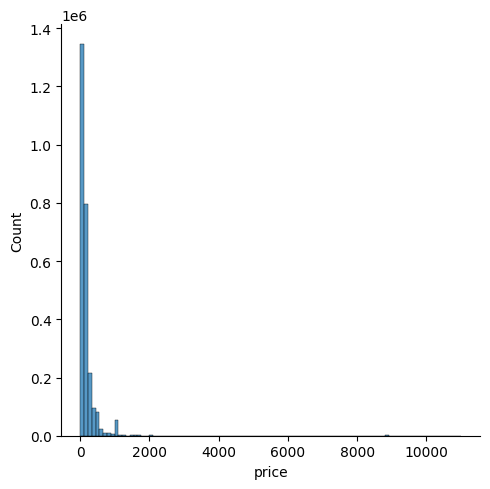

In [ ]:
# check the distribution of price
plt.figure(figsize=(20,12))
sns.displot(df['price'],bins=100)
plt.show()

In [ ]:
# find unique listings
df[['listing_id']].nunique()

listing_id    7281
dtype: int64

In [ ]:
df.to_csv("calendar_limpio.csv", index=False)

In [ ]:
df=pd.read_csv("C:/Users/Rocio/Desktop/ROCÍO/Todo_rocío/Curso_Data_Analyst/Codes/temario/temario/Informe 2-Upgrade/listings.csv", on_bad_lines='skip') ##ignora las líneas problemáticas

In [ ]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,97945,https://www.airbnb.com/rooms/97945,20241227033114,2024-12-27,city scrape,Deluxw-Apartm. with roof terrace,NaN,We are living in a outskirt of Munich its call...,https://a0.muscache.com/pictures/2459996/10b4c...,517685,...,4.93,4.78,4.73,NaN,f,2,2,0,0,0.78
1,114695,https://www.airbnb.com/rooms/114695,20241227033114,2024-12-27,city scrape,Apartment Munich/East with sundeck,NaN,NaN,https://a0.muscache.com/pictures/21571874/960e...,581737,...,5.00,4.67,4.62,NaN,f,3,3,0,0,0.48
2,127383,https://www.airbnb.com/rooms/127383,20241227033114,2024-12-27,city scrape,City apartment next to Pinakothek,NaN,NaN,https://a0.muscache.com/pictures/79238c11-bc61...,630556,...,4.96,4.91,4.81,NaN,f,1,1,0,0,0.70
3,159634,https://www.airbnb.com/rooms/159634,20241227033114,2024-12-27,previous scrape,"Fancy, bright central roof top flat and homeof...",In this idyllic stylish flat you live very qui...,"Very quiet, green, squirrels and beergardens a...",https://a0.muscache.com/pictures/336144dc-b06d...,765694,...,4.80,4.59,4.45,NaN,t,1,1,0,0,0.27
4,170154,https://www.airbnb.com/rooms/170154,20241227033114,2024-12-27,city scrape,"Own floor & bath, parking & breakfast","Enjoy a quiet neighbourhood, easy access to th...",NaN,https://a0.muscache.com/pictures/31636890/593e...,108297,...,4.98,4.77,4.91,NaN,f,1,0,1,0,3.55


In [ ]:
df.tail()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
7276,1318625666596506954,https://www.airbnb.com/rooms/1318625666596506954,20241227033114,2024-12-27,city scrape,Stylish Home Bogenhausen,Hype two room apartment in Bogenhausen. The br...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,44358496,...,NaN,NaN,NaN,NaN,t,2,1,1,0,NaN
7277,1318641181003988391,https://www.airbnb.com/rooms/1318641181003988391,20241227033114,2024-12-27,city scrape,Boho City Livings Munich,Welcome to your stylish boho home in the middl...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,175660452,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
7278,1319473798937477143,https://www.airbnb.com/rooms/1319473798937477143,20241227033114,2024-12-27,city scrape,Welcome to MyCozyHome,"From this centrally located accommodation, you...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,508416232,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
7279,1319597606422421040,https://www.airbnb.com/rooms/1319597606422421040,20241227033114,2024-12-27,city scrape,3-room apartment in the center of Munich,3-room apartment in the center of Munich with ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,594363723,...,NaN,NaN,NaN,NaN,t,2,2,0,0,NaN
7280,1319650217063619527,https://www.airbnb.com/rooms/1319650217063619527,20241227033114,2024-12-27,city scrape,Beautiful apartment-Selverster,"Hi, there is one big apartment with full furni...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,595328708,...,NaN,NaN,NaN,NaN,f,2,2,0,0,NaN


In [ ]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 7281
Number of columns: 75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7281 entries, 0 to 7280
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7281 non-null   int64  
 1   listing_url                                   7281 non-null   object 
 2   scrape_id                                     7281 non-null   int64  
 3   last_scraped                                  7281 non-null   object 
 4   source                                        7281 non-null   object 
 5   name                                          7281 non-null   object 
 6   description                                   7010 non-null   object 
 7   neighborhood_overview                         2564 non-null   object 
 8   picture_url                                   7281 non-null   object 
 9   host_id                                       7281 non-null   i

In [ ]:
df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isna().any()

id                                              False
listing_url                                     False
scrape_id                                       False
last_scraped                                    False
source                                          False
                                                ...  
calculated_host_listings_count                  False
calculated_host_listings_count_entire_homes     False
calculated_host_listings_count_private_rooms    False
calculated_host_listings_count_shared_rooms     False
reviews_per_month                                True
Length: 75, dtype: bool

In [ ]:
df.isna().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               1379
Length: 75, dtype: int64

In [ ]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [ ]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,7.281000e+03,7.281000e+03,7.281000e+03,7279.000000,7279.000000,0.0,7281.000000,7281.000000,7281.000000,4722.000000,...,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,7281.000000,7281.000000,7281.000000,7281.000000,5902.000000
mean,6.195128e+17,2.024123e+13,2.002912e+08,5.636626,7.122819,NaN,48.139742,11.563053,2.769674,1.139030,...,4.735713,4.852311,4.865474,4.790410,4.628128,2.945612,2.138030,0.784645,0.004532,1.043478
std,5.156732e+17,0.000000e+00,1.979409e+08,42.430118,49.848934,NaN,0.025549,0.050165,1.648207,0.512805,...,0.413522,0.305526,0.299123,0.307753,0.420937,8.383039,8.256452,2.028043,0.076721,1.751251
min,9.794500e+04,2.024123e+13,1.581000e+03,1.000000,1.000000,NaN,48.071440,11.388350,1.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,3.845796e+07,2.024123e+13,2.799445e+07,1.000000,1.000000,NaN,48.123240,11.538370,2.000000,1.000000,...,4.650000,4.820000,4.850000,4.710000,4.500000,1.000000,0.000000,0.000000,0.000000,0.190000
50%,7.353609e+17,2.024123e+13,1.175858e+08,1.000000,2.000000,NaN,48.137090,11.564599,2.000000,1.000000,...,4.880000,4.960000,5.000000,4.880000,4.720000,1.000000,1.000000,0.000000,0.000000,0.500000
75%,1.112765e+18,2.024123e+13,3.766110e+08,2.000000,3.000000,NaN,48.155610,11.586773,4.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,4.900000,2.000000,1.000000,1.000000,0.000000,1.240000
max,1.319650e+18,2.024123e+13,6.675842e+08,1140.000000,1307.000000,NaN,48.228020,11.712770,16.000000,23.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,78.000000,78.000000,24.000000,2.000000,48.810000


In [ ]:
for i in df.columns.tolist():
    print("No hay valores únicos en ",i,df[i].nunique())

No hay valores únicos en  id 7281
No hay valores únicos en  listing_url 7281
No hay valores únicos en  scrape_id 1
No hay valores únicos en  last_scraped 2
No hay valores únicos en  source 2
No hay valores únicos en  name 7033
No hay valores únicos en  description 6414
No hay valores únicos en  neighborhood_overview 2290
No hay valores únicos en  picture_url 7066
No hay valores únicos en  host_id 5822
No hay valores únicos en  host_url 5822
No hay valores únicos en  host_name 2533
No hay valores únicos en  host_since 3088
No hay valores únicos en  host_location 327
No hay valores únicos en  host_about 2097
No hay valores únicos en  host_response_time 4
No hay valores únicos en  host_response_rate 55
No hay valores únicos en  host_acceptance_rate 100
No hay valores únicos en  host_is_superhost 2
No hay valores únicos en  host_thumbnail_url 5521
No hay valores únicos en  host_picture_url 5521
No hay valores únicos en  host_neighbourhood 72
No hay valores únicos en  host_listings_count 32

In [ ]:
const_cols = [col for col in df.columns if df[col].nunique() == 1]
print("Columnas constantes:", const_cols)

Columnas constantes: ['scrape_id']


In [ ]:
null_cols = [col for col in df.columns if df[col].isna().all()]
print("Columnas completamente nulas:", null_cols)

Columnas completamente nulas: ['neighbourhood_group_cleansed', 'calendar_updated']


In [ ]:
low_var_cols = [col for col in df.columns if df[col].nunique() < 5]
print("Columnas con baja variabilidad:", low_var_cols)

Columnas con baja variabilidad: ['scrape_id', 'last_scraped', 'source', 'host_response_time', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type', 'calendar_updated', 'has_availability', 'calendar_last_scraped', 'instant_bookable', 'calculated_host_listings_count_shared_rooms']


In [ ]:
df.drop(["id","scrape_id","host_url","host_thumbnail_url","host_picture_url","picture_url","listing_url","neighbourhood_group_cleansed","neighborhood_overview","description","calendar_updated","source","host_verifications","license"], axis=1, inplace=True) 
df.head()

,last_scraped,name,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2024-12-27,Deluxw-Apartm. with roof terrace,517685,Angelika,2011-04-18,"Munich, Germany",Ich freue mich auf viele internationale Gäste!...,a few days or more,25%,6%,...,4.90,4.93,4.78,4.73,f,2,2,0,0,0.78
1,2024-12-27,Apartment Munich/East with sundeck,581737,Stephan,2011-05-12,"Munich, Germany",I am looking forward to meet interesting peopl...,within a few hours,100%,98%,...,4.97,5.00,4.67,4.62,f,3,3,0,0,0.48
2,2024-12-27,City apartment next to Pinakothek,630556,Sonja,2011-05-26,"Munich, Germany","Hi, mein Name ist Sonja und ich freue mich net...",within a few hours,67%,89%,...,4.98,4.96,4.91,4.81,f,1,1,0,0,0.70
3,2024-12-27,"Fancy, bright central roof top flat and homeof...",765694,Susana,2011-07-01,"Munich, Germany",outdoorsy sportive Person from Munich. I love ...,within an hour,100%,92%,...,4.75,4.80,4.59,4.45,t,1,1,0,0,0.27
4,2024-12-27,"Own floor & bath, parking & breakfast",108297,Alex,2010-04-14,"Munich, Germany",We love to travel and dream of living in a hou...,within a few hours,100%,100%,...,4.99,4.98,4.77,4.91,f,1,0,1,0,3.55


In [ ]:
print(df.columns)

Index(['last_scraped', 'name', 'host_id', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 

In [ ]:
df.isnull().any()

last_scraped                                    False
name                                            False
host_id                                         False
host_name                                        True
host_since                                       True
                                                ...  
calculated_host_listings_count                  False
calculated_host_listings_count_entire_homes     False
calculated_host_listings_count_private_rooms    False
calculated_host_listings_count_shared_rooms     False
reviews_per_month                                True
Length: 61, dtype: bool

In [ ]:
df['host_name'].fillna(0, inplace=True)
df['reviews_per_month'].fillna(0, inplace=True)
df.head()

C:\Users\Rocio\AppData\Local\Temp\ipykernel_12652\192256593.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['host_name'].fillna(0, inplace=True)
C:\Users\Rocio\AppData\Local\Temp\ipykernel_12652\192256593.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

,last_scraped,name,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2024-12-27,Deluxw-Apartm. with roof terrace,517685,Angelika,2011-04-18,"Munich, Germany",Ich freue mich auf viele internationale Gäste!...,a few days or more,25%,6%,...,4.90,4.93,4.78,4.73,f,2,2,0,0,0.78
1,2024-12-27,Apartment Munich/East with sundeck,581737,Stephan,2011-05-12,"Munich, Germany",I am looking forward to meet interesting peopl...,within a few hours,100%,98%,...,4.97,5.00,4.67,4.62,f,3,3,0,0,0.48
2,2024-12-27,City apartment next to Pinakothek,630556,Sonja,2011-05-26,"Munich, Germany","Hi, mein Name ist Sonja und ich freue mich net...",within a few hours,67%,89%,...,4.98,4.96,4.91,4.81,f,1,1,0,0,0.70
3,2024-12-27,"Fancy, bright central roof top flat and homeof...",765694,Susana,2011-07-01,"Munich, Germany",outdoorsy sportive Person from Munich. I love ...,within an hour,100%,92%,...,4.75,4.80,4.59,4.45,t,1,1,0,0,0.27
4,2024-12-27,"Own floor & bath, parking & breakfast",108297,Alex,2010-04-14,"Munich, Germany",We love to travel and dream of living in a hou...,within a few hours,100%,100%,...,4.99,4.98,4.77,4.91,f,1,0,1,0,3.55


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7281 entries, 0 to 7280
Data columns (total 61 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  7281 non-null   object 
 1   name                                          7281 non-null   object 
 2   host_id                                       7281 non-null   int64  
 3   host_name                                     7281 non-null   object 
 4   host_since                                    7279 non-null   object 
 5   host_location                                 5723 non-null   object 
 6   host_about                                    2811 non-null   object 
 7   host_response_time                            4666 non-null   object 
 8   host_response_rate                            4666 non-null   object 
 9   host_acceptance_rate                          5854 non-null   o

In [ ]:
df.describe()

,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,7.281000e+03,7279.000000,7279.000000,7281.000000,7281.000000,7281.000000,4722.000000,6502.000000,4724.000000,7281.000000,...,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,7281.000000,7281.000000,7281.000000,7281.000000,7281.000000
mean,2.002912e+08,5.636626,7.122819,48.139742,11.563053,2.769674,1.139030,1.251615,1.637172,7.841368,...,4.735713,4.852311,4.865474,4.790410,4.628128,2.945612,2.138030,0.784645,0.004532,0.845847
std,1.979409e+08,42.430118,49.848934,0.025549,0.050165,1.648207,0.512805,1.059553,1.339486,30.866323,...,0.413522,0.305526,0.299123,0.307753,0.420937,8.383039,8.256452,2.028043,0.076721,1.628844
min,1.581000e+03,1.000000,1.000000,48.071440,11.388350,1.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.799445e+07,1.000000,1.000000,48.123240,11.538370,2.000000,1.000000,1.000000,1.000000,1.000000,...,4.650000,4.820000,4.850000,4.710000,4.500000,1.000000,0.000000,0.000000,0.000000,0.060000
50%,1.175858e+08,1.000000,2.000000,48.137090,11.564599,2.000000,1.000000,1.000000,1.000000,2.000000,...,4.880000,4.960000,5.000000,4.880000,4.720000,1.000000,1.000000,0.000000,0.000000,0.330000
75%,3.766110e+08,2.000000,3.000000,48.155610,11.586773,4.000000,1.000000,1.000000,2.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,4.900000,2.000000,1.000000,1.000000,0.000000,1.000000
max,6.675842e+08,1140.000000,1307.000000,48.228020,11.712770,16.000000,23.000000,50.000000,23.000000,999.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,78.000000,78.000000,24.000000,2.000000,48.810000


In [ ]:
df.shape

(7281, 61)

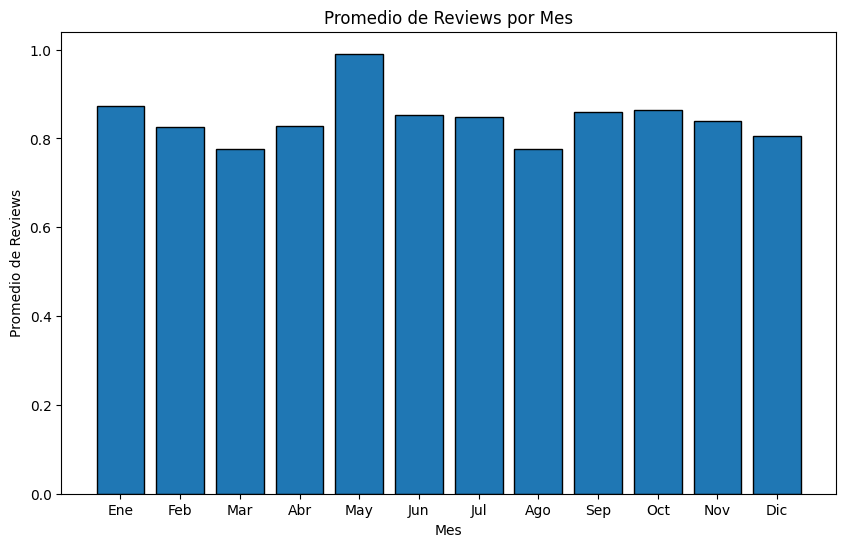

In [ ]:
# Crear la columna 'month' (asegúrate de que exista)
df['month'] = np.random.randint(1, 13, size=len(df))  

# Agrupar por mes y calcular el promedio de reviews_per_month
monthly_reviews = df.groupby('month')['reviews_per_month'].mean()

# Graficar los datos agrupados por mes
plt.figure(figsize=(10, 6))
plt.bar(monthly_reviews.index, monthly_reviews.values, edgecolor='black')  
plt.title('Promedio de Reviews por Mes')
plt.xlabel('Mes')
plt.ylabel('Promedio de Reviews')
plt.xticks(ticks=range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.show()

In [ ]:
# find unique hosts
df[['host_id']].nunique()

host_id    5822
dtype: int64

In [ ]:
df.to_csv("listings_limpio.csv", index=False)

In [ ]:
df = pd.read_csv(r"C:\Users\Rocio\Desktop\ROCÍO\Todo_rocío\Curso_Data_Analyst\Codes\temario\temario\Informe 2-Upgrade\neighbourhoods.csv", on_bad_lines='skip') #ignora las líneas problemáticas

In [ ]:
df.head()

,neighbourhood_group,neighbourhood
0,NaN,Allach-Untermenzing
1,NaN,Altstadt-Lehel
2,NaN,Aubing-Lochhausen-Langwied
3,NaN,Au-Haidhausen
4,NaN,Berg am Laim


In [ ]:
df.tail()

,neighbourhood_group,neighbourhood
20,NaN,Sendling
21,NaN,Sendling-Westpark
22,NaN,Thalkirchen-Obersendling-Forstenried-Fürstenri...
23,NaN,Tudering-Riem
24,NaN,Untergiesing-Harlaching


In [ ]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 25
Number of columns: 2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  0 non-null      float64
 1   neighbourhood        25 non-null     object 
dtypes: float64(1), object(1)
memory usage: 532.0+ bytes


In [ ]:
df.dtypes

neighbourhood_group    float64
neighbourhood           object
dtype: object

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isna().any()

neighbourhood_group     True
neighbourhood          False
dtype: bool

In [ ]:
df.isna().sum()

neighbourhood_group    25
neighbourhood           0
dtype: int64

In [ ]:
df.columns

Index(['neighbourhood_group', 'neighbourhood'], dtype='object')

In [ ]:
df.describe()

,neighbourhood_group
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [ ]:
for i in df.columns.tolist():
    print("No hay valores únicos en ",i,df[i].nunique())

No hay valores únicos en  neighbourhood_group 0
No hay valores únicos en  neighbourhood 25


In [ ]:
const_cols = [col for col in df.columns if df[col].nunique() == 1]
print("Columnas constantes:", const_cols)

Columnas constantes: []


In [ ]:
null_cols = [col for col in df.columns if df[col].isna().all()]
print("Columnas completamente nulas:", null_cols)

Columnas completamente nulas: ['neighbourhood_group']


In [ ]:
low_var_cols = [col for col in df.columns if df[col].nunique() < 5]
print("Columnas con baja variabilidad:", low_var_cols)

Columnas con baja variabilidad: ['neighbourhood_group']


In [ ]:
df.drop(["neighbourhood_group"], axis=1, inplace=True) 
df.head()

,neighbourhood
0,Allach-Untermenzing
1,Altstadt-Lehel
2,Aubing-Lochhausen-Langwied
3,Au-Haidhausen
4,Berg am Laim


In [ ]:
df.columns

Index(['neighbourhood'], dtype='object')

In [ ]:
df.isnull().any()

neighbourhood    False
dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   neighbourhood  25 non-null     object
dtypes: object(1)
memory usage: 332.0+ bytes


In [ ]:
df.describe()

,neighbourhood
count,25
unique,25
top,Allach-Untermenzing
freq,1


In [ ]:
df.shape

(25, 1)

In [ ]:
df.to_csv("neighbourhoods_limpio.csv", index=False)

In [ ]:
df=pd.read_csv("C:/Users/Rocio/Desktop/ROCÍO/Todo_rocío/Curso_Data_Analyst/Codes/temario/temario/Informe 2-Upgrade/reviews.csv", on_bad_lines='skip') ##ignora las líneas problemáticas

In [ ]:
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,97945,591337,2011-10-03,508190,Lauren,We very much enjoyed staying at Angelika's apa...
1,97945,796084,2011-12-20,341171,Marty & Evelyn,"Angelika was a very gracious host, and went ou..."
2,97945,964528,2012-03-02,1647967,Sue,The apartment was beautiful and Angelika provi...
3,97945,1353862,2012-05-26,2414638,Mel And George,We loved the warm welcome and was pleasantly s...
4,97945,1375610,2012-05-29,2323197,Anais,"Dès notre arrivée, notre hote nous a cordialem..."


In [ ]:
df.tail()

,listing_id,id,date,reviewer_id,reviewer_name,comments
203109,1300763958110951287,1318088082702645693,2024-12-23,69264332,Nancy,Place was exactly as advertised.<br/>Literally...
203110,1302802610453075904,1307182199737004862,2024-12-08,357917503,OliverGabriel V,"Very good and quiet location, would stay again"
203111,1302873421886981666,1304319666182338745,2024-12-04,665165849,Calum,Charming host and lovely apartment
203112,1303436233723417574,1317289961141271413,2024-12-22,61687115,Erica,Very good central location close to metro stop...
203113,1303761439223515284,1317297376364308633,2024-12-22,82623155,Nikita,The place is great! The neighbourhood is very ...


In [ ]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 203114
Number of columns: 6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203114 entries, 0 to 203113
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     203114 non-null  int64 
 1   id             203114 non-null  int64 
 2   date           203114 non-null  object
 3   reviewer_id    203114 non-null  int64 
 4   reviewer_name  203114 non-null  object
 5   comments       203099 non-null  object
dtypes: int64(3), object(3)
memory usage: 9.3+ MB


In [ ]:
df.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isna().any()

listing_id       False
id               False
date             False
reviewer_id      False
reviewer_name    False
comments          True
dtype: bool

In [ ]:
df.isna().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         15
dtype: int64

In [ ]:
df.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [ ]:
df.describe()

,listing_id,id,reviewer_id
count,2.031140e+05,2.031140e+05,2.031140e+05
mean,1.991359e+17,6.198529e+17,1.831585e+08
std,3.785919e+17,5.027574e+17,1.706322e+08
min,9.794500e+04,2.976850e+05,1.000000e+00
25%,8.264691e+06,4.921626e+08,3.969432e+07
50%,2.930124e+07,7.287574e+17,1.242886e+08
75%,5.173816e+07,1.094093e+18,2.900463e+08
max,1.313865e+18,1.324624e+18,6.681921e+08


In [ ]:
for i in df.columns.tolist():
    print("No hay valores únicos en ",i,df[i].nunique())

No hay valores únicos en  listing_id 5902
No hay valores únicos en  id 203114
No hay valores únicos en  date 4540
No hay valores únicos en  reviewer_id 190165
No hay valores únicos en  reviewer_name 36668
No hay valores únicos en  comments 196437


In [ ]:
const_cols = [col for col in df.columns if df[col].nunique() == 1]
print("Columnas constantes:", const_cols)

Columnas constantes: []


In [ ]:
null_cols = [col for col in df.columns if df[col].isna().all()]
print("Columnas completamente nulas:", null_cols)

Columnas completamente nulas: []


In [ ]:
low_var_cols = [col for col in df.columns if df[col].nunique() < 5]
print("Columnas con baja variabilidad:", low_var_cols)

Columnas con baja variabilidad: []


In [ ]:
df.drop(["comments","id"], axis=1, inplace=True) 
df.head()

,listing_id,date,reviewer_id,reviewer_name
0,97945,2011-10-03,508190,Lauren
1,97945,2011-12-20,341171,Marty & Evelyn
2,97945,2012-03-02,1647967,Sue
3,97945,2012-05-26,2414638,Mel And George
4,97945,2012-05-29,2323197,Anais


In [ ]:
print(df.columns)

Index(['listing_id', 'date', 'reviewer_id', 'reviewer_name'], dtype='object')


In [ ]:
df.isnull().any()

listing_id       False
date             False
reviewer_id      False
reviewer_name    False
dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203114 entries, 0 to 203113
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     203114 non-null  int64 
 1   date           203114 non-null  object
 2   reviewer_id    203114 non-null  int64 
 3   reviewer_name  203114 non-null  object
dtypes: int64(2), object(2)
memory usage: 6.2+ MB


In [ ]:
df.describe()

,listing_id,reviewer_id
count,2.031140e+05,2.031140e+05
mean,1.991359e+17,1.831585e+08
std,3.785919e+17,1.706322e+08
min,9.794500e+04,1.000000e+00
25%,8.264691e+06,3.969432e+07
50%,2.930124e+07,1.242886e+08
75%,5.173816e+07,2.900463e+08
max,1.313865e+18,6.681921e+08


In [ ]:
df.dtypes

listing_id        int64
date             object
reviewer_id       int64
reviewer_name    object
dtype: object

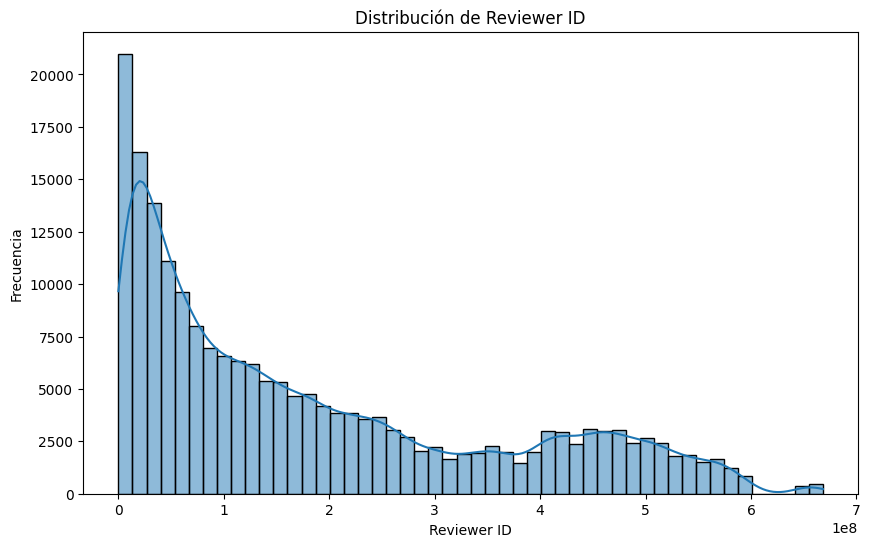

In [ ]:
# Histograma para reviewer_id
plt.figure(figsize=(10, 6))
sns.histplot(df['reviewer_id'], bins=50, kde=True)
plt.title('Distribución de Reviewer ID')
plt.xlabel('Reviewer ID')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# find unique reviewers
df[['reviewer_id']].nunique()

reviewer_id    190165
dtype: int64

In [ ]:
df.to_csv("reviews_limpio.csv", index=False)

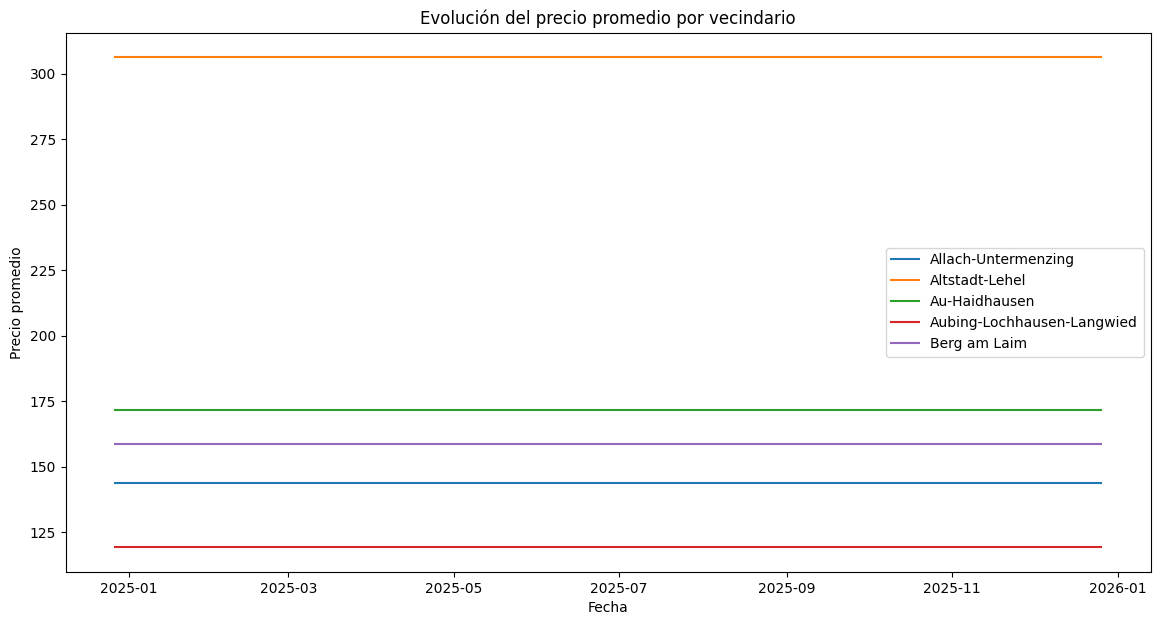

In [ ]:
# Cargar los datos (si no están ya cargados)
calendar = pd.read_csv("C:/Users/Rocio/Desktop/ROCÍO/Todo_rocío/Curso_Data_Analyst/Codes/temario/temario/Informe 2-Upgrade/calendar.csv", on_bad_lines='skip')
listings = pd.read_csv("C:/Users/Rocio/Desktop/ROCÍO/Todo_rocío/Curso_Data_Analyst/Codes/temario/temario/Informe 2-Upgrade/listings.csv", on_bad_lines='skip')
import pandas as pd
import matplotlib.pyplot as plt
# Cargar solo las columnas necesarias
calendar = pd.read_csv(
    "C:/Users/Rocio/Desktop/ROCÍO/Todo_rocío/Curso_Data_Analyst/Codes/temario/temario/Informe 2-Upgrade/calendar.csv",
    usecols=['listing_id', 'date', 'price'],
    on_bad_lines='skip'
)
listings = pd.read_csv(
    "C:/Users/Rocio/Desktop/ROCÍO/Todo_rocío/Curso_Data_Analyst/Codes/temario/temario/Informe 2-Upgrade/listings.csv",
    usecols=['id', 'neighbourhood_cleansed'],
    on_bad_lines='skip'
)
# Limpiar y convertir tipos
calendar['price'] = calendar['price'].astype(str).str.replace(r'[^\d.]', '', regex=True).astype(float)
calendar['date'] = pd.to_datetime(calendar['date'], errors='coerce')
# Unir los datasets
df = pd.merge(calendar, listings, left_on='listing_id', right_on='id', how='left')
# Agrupar por vecindario y fecha, y calcular el precio promedio
precios_por_vecindario = df.groupby(['neighbourhood_cleansed', 'date'])['price'].mean().reset_index()
# Selecciona algunos vecindarios para graficar
vecindarios = precios_por_vecindario['neighbourhood_cleansed'].unique()[:5]
plt.figure(figsize=(14, 7))
for barrio in vecindarios:
    datos_barrio = precios_por_vecindario[precios_por_vecindario['neighbourhood_cleansed'] == barrio]
    plt.plot(datos_barrio['date'], datos_barrio['price'], label=barrio)
plt.xlabel('Fecha')
plt.ylabel('Precio promedio')
plt.title('Evolución del precio promedio por vecindario')
plt.legend()
plt.show()

               listing_id  disponibilidad  precio_promedio
7280  1319650217063619527             365            300.0
6556  1239003655830192964             365            380.0
548               8545832             365            235.0
6503  1236316747857602420             365            179.0
538               8433934             365            150.0
6531  1237546766142342743             365            120.0
3459   711223498069107789             365            250.0
3457   711200430750123152             365            150.0
3443   710012468761462528             365            350.0
6553  1238890077902766494             365            327.0


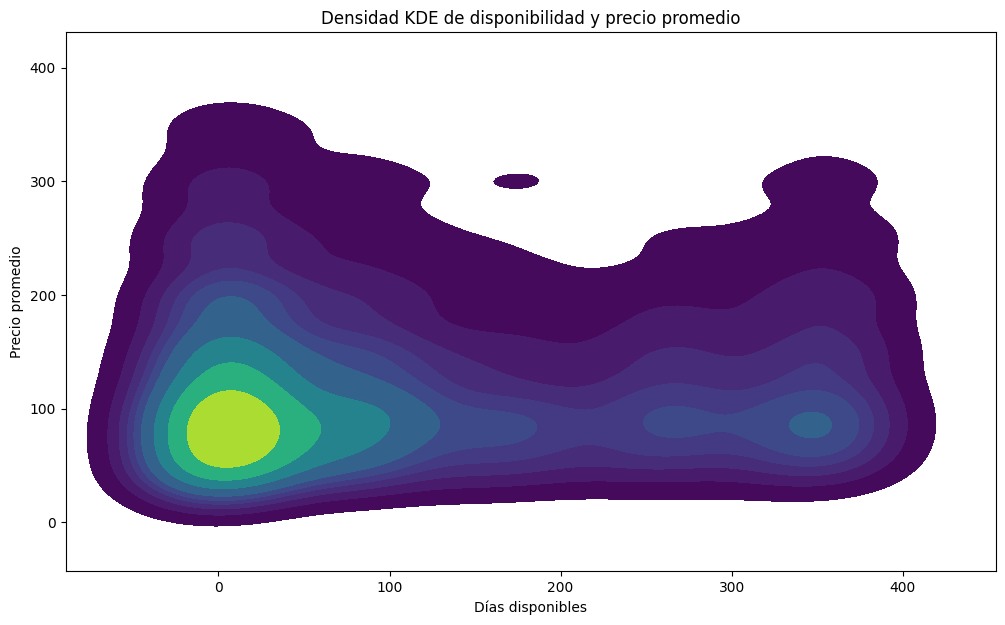

In [ ]:
# 1. Cargar el calendar solo con las columnas necesarias
calendar = pd.read_csv(
    "C:/Users/Rocio/Desktop/ROCÍO/Todo_rocío/Curso_Data_Analyst/Codes/temario/temario/Informe 2-Upgrade/calendar.csv",
    usecols=['listing_id', 'available', 'price'],
    on_bad_lines='skip'
)
# 2. Limpiar y convertir tipos
calendar['price'] = calendar['price'].astype(str).str.replace(r'[^\d.]', '', regex=True).astype(float)
# 3. Calcular disponibilidad total y precio promedio por anuncio
disponibilidad = calendar.groupby('listing_id')['available'].apply(lambda x: (x == 't').sum())
precio_promedio = calendar.groupby('listing_id')['price'].mean()
# 4. Unir ambos resultados en un DataFrame
df_disp_precio = pd.DataFrame({
    'disponibilidad': disponibilidad,
    'precio_promedio': precio_promedio
}).reset_index()
# 5. Eliminar outliers de precio_promedio usando IQR
Q1 = df_disp_precio['precio_promedio'].quantile(0.25)
Q3 = df_disp_precio['precio_promedio'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
df_disp_precio = df_disp_precio[
    (df_disp_precio['precio_promedio'] >= limite_inferior) &
    (df_disp_precio['precio_promedio'] <= limite_superior)
]
# 6. Mostrar los anuncios con mayor disponibilidad
top_disponibles = df_disp_precio.sort_values('disponibilidad', ascending=False).head(10)
print(top_disponibles)
# 7. Relación entre disponibilidad y precio promedio (gráfico)
plt.figure(figsize=(12,7))
sns.kdeplot(
    x=df_disp_precio['disponibilidad'],
    y=df_disp_precio['precio_promedio'],
    fill=True, cmap='viridis', thresh=0.05
)
plt.xlabel('Días disponibles')
plt.ylabel('Precio promedio')
plt.title('Densidad KDE de disponibilidad y precio promedio')
plt.show()

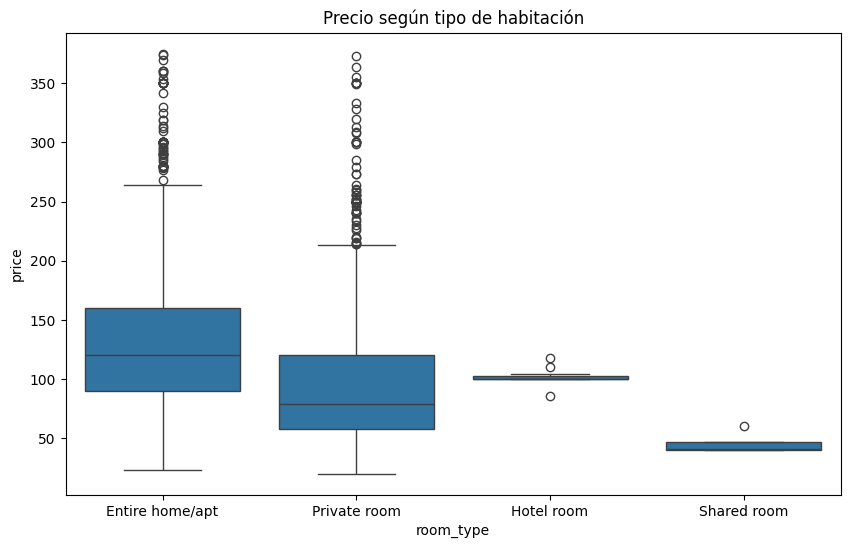

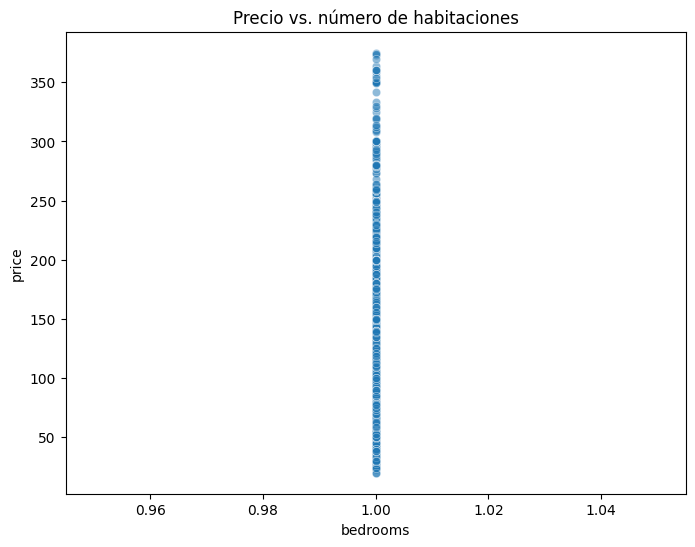

In [ ]:
# Cargar solo las columnas relevantes
listings = pd.read_csv(
    "C:/Users/Rocio/Desktop/ROCÍO/Todo_rocío/Curso_Data_Analyst/Codes/temario/temario/Informe 2-Upgrade/listings.csv",
    usecols=['id', 'room_type', 'property_type', 'bedrooms', 'beds', 'price'],
    on_bad_lines='skip'
)
# Limpiar el precio y manejar vacíos
listings['price'] = (
    listings['price']
    .astype(str)
    .str.replace(r'[^\d.]', '', regex=True)
    .replace('', np.nan)
    .astype(float)
)
# Eliminar nulos en columnas clave
listings = listings.dropna(subset=['price', 'room_type', 'property_type', 'bedrooms', 'beds'])

# Quitar outliers de price, bedrooms y beds usando IQR
for col in ['price', 'bedrooms', 'beds']:
    Q1 = listings[col].quantile(0.25)
    Q3 = listings[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    listings = listings[(listings[col] >= limite_inferior) & (listings[col] <= limite_superior)]

# Boxplot: precio según tipo de habitación
plt.figure(figsize=(10,6))
sns.boxplot(x='room_type', y='price', data=listings)
plt.title('Precio según tipo de habitación')
plt.show()
# Relación entre número de habitaciones y precio
plt.figure(figsize=(8,6))
sns.scatterplot(x='bedrooms', y='price', data=listings, alpha=0.5)
plt.title('Precio vs. número de habitaciones')
plt.show()

In [ ]:
# Cargar solo las columnas necesarias
listings = pd.read_csv(
    "C:/Users/Rocio/Desktop/ROCÍO/Todo_rocío/Curso_Data_Analyst/Codes/temario/temario/Informe 2-Upgrade/listings.csv",
    usecols=['neighbourhood_cleansed', 'review_scores_rating'],
    on_bad_lines='skip'
)
# Eliminar nulos en la puntuación
listings = listings.dropna(subset=['review_scores_rating'])
# Calcular el promedio de puntuación por vecindario
mejores_vecindarios = listings.groupby('neighbourhood_cleansed')['review_scores_rating'].mean().sort_values(ascending=False)
print(mejores_vecindarios.head(10))

neighbourhood_cleansed
Au-Haidhausen              4.846329
Pasing-Obermenzing         4.834872
Sendling-Westpark          4.830521
Schwanthalerhöhe           4.829010
Schwabing-West             4.827441
Untergiesing-Harlaching    4.815187
Tudering-Riem              4.811244
Allach-Untermenzing        4.811186
Altstadt-Lehel             4.807378
Bogenhausen                4.803895
Name: review_scores_rating, dtype: float64


In [ ]:
# Cargar solo las columnas necesarias
listings = pd.read_csv(
    "C:/Users/Rocio/Desktop/ROCÍO/Todo_rocío/Curso_Data_Analyst/Codes/temario/temario/Informe 2-Upgrade/listings.csv",
    usecols=['neighbourhood_cleansed', 'price'],
    on_bad_lines='skip'
)
# Limpiar el precio
listings['price'] = (
    listings['price']
    .astype(str)
    .str.replace(r'[^\d.]', '', regex=True)
    .replace('', np.nan)  # Cambiado a np.nan
    .astype(float)
)
# Eliminar nulos
listings = listings.dropna(subset=['price'])
# Calcular el precio promedio por vecindario
vecindarios_baratos = listings.groupby('neighbourhood_cleansed')['price'].mean().sort_values().head(10)
print("Vecindarios más baratos (precio promedio):")
print(vecindarios_baratos)

Vecindarios más baratos (precio promedio):
neighbourhood_cleansed
Ramersdorf-Perlach            109.275132
Aubing-Lochhausen-Langwied    113.000000
Hadern                        118.750000
Tudering-Riem                 123.054217
Allach-Untermenzing           123.178571
Milbertshofen-Am Hart         123.901840
Moosach                       137.509615
Pasing-Obermenzing            140.708029
Obergiesing                   141.621795
Untergiesing-Harlaching       145.342857
Name: price, dtype: float64


                      id  number_of_reviews  price
3169  683831625017656560                 63  114.0
2591            51799819                 63   90.0
205              1682832                 63  120.0
2034            42355563                 63   95.0
1178            25655712                 63   52.0
1348            28818889                 63   64.0
1884            38923643                 63   76.0
2806  566278327673262838                 63  331.0
4960  983772752818969494                 63  104.0
3589  719563482537230381                 63   40.0


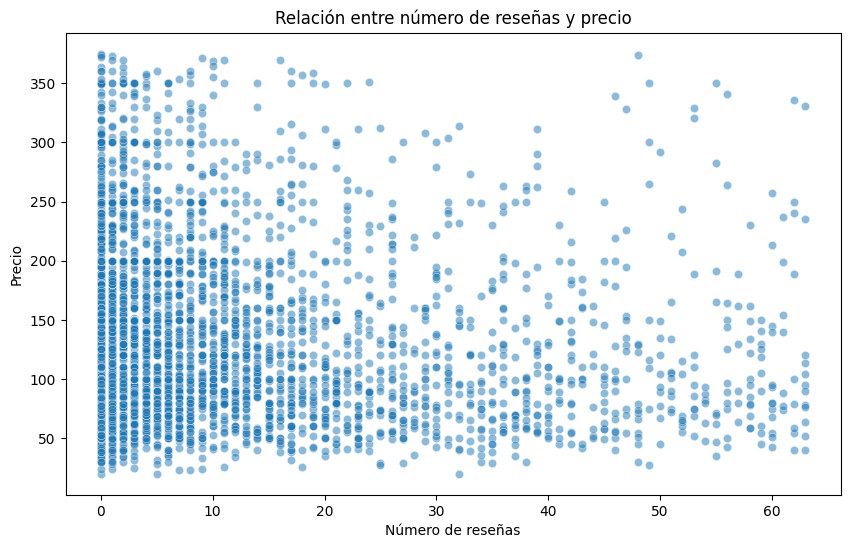

In [ ]:
# Cargar las columnas necesarias
listings = pd.read_csv(
    "C:/Users/Rocio/Desktop/ROCÍO/Todo_rocío/Curso_Data_Analyst/Codes/temario/temario/Informe 2-Upgrade/listings.csv",
    usecols=['id', 'number_of_reviews', 'price'],
    on_bad_lines='skip'
)
# Limpiar el precio
listings['price'] = (
    listings['price']
    .astype(str)
    .str.replace(r'[^\d.]', '', regex=True)
    .replace('', np.nan)
    .astype(float)
)
# Eliminar nulos
listings = listings.dropna(subset=['price', 'number_of_reviews'])

# Quitar outliers de price y number_of_reviews usando IQR
for col in ['price', 'number_of_reviews']:
    Q1 = listings[col].quantile(0.25)
    Q3 = listings[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    listings = listings[(listings[col] >= limite_inferior) & (listings[col] <= limite_superior)]

# Top 10 listados con más reseñas
top_reviews = listings.sort_values('number_of_reviews', ascending=False).head(10)
print(top_reviews[['id', 'number_of_reviews', 'price']])
# Relación entre cantidad de reseñas y precio (gráfico)
plt.figure(figsize=(10,6))
sns.scatterplot(x='number_of_reviews', y='price', data=listings, alpha=0.5)
plt.xlabel('Número de reseñas')
plt.ylabel('Precio')
plt.title('Relación entre número de reseñas y precio')
plt.show()

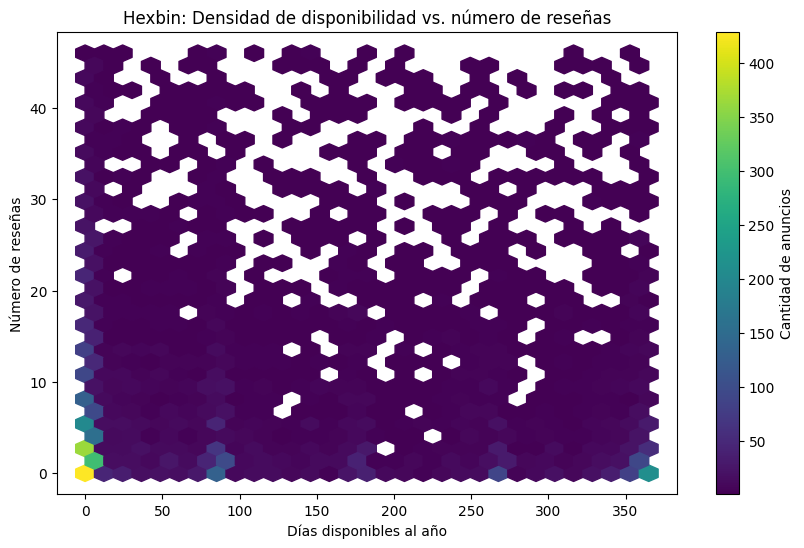

In [ ]:
# 1. Cargar y procesar la disponibilidad
calendar = pd.read_csv(
    "C:/Users/Rocio/Desktop/ROCÍO/Todo_rocío/Curso_Data_Analyst/Codes/temario/temario/Informe 2-Upgrade/calendar.csv",
    usecols=['listing_id', 'available'],
    on_bad_lines='skip'
)
# Calcular días disponibles por anuncio
disponibilidad = calendar.groupby('listing_id')['available'].apply(lambda x: (x == 't').sum()).reset_index()
disponibilidad.rename(columns={'available': 'dias_disponibles'}, inplace=True)
# 2. Cargar las reseñas por anuncio
listings = pd.read_csv(
    "C:/Users/Rocio/Desktop/ROCÍO/Todo_rocío/Curso_Data_Analyst/Codes/temario/temario/Informe 2-Upgrade/listings.csv",
    usecols=['id', 'number_of_reviews'],
    on_bad_lines='skip'
)
listings.rename(columns={'id': 'listing_id'}, inplace=True)
# 3. Unir ambos DataFrames
df = pd.merge(disponibilidad, listings, on='listing_id')

# Quitar outliers de dias_disponibles y number_of_reviews usando IQR
for col in ['dias_disponibles', 'number_of_reviews']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df = df[(df[col] >= limite_inferior) & (df[col] <= limite_superior)]

# 4. Gráfico de dispersión
plt.figure(figsize=(10,6))
plt.hexbin(df['dias_disponibles'], df['number_of_reviews'], gridsize=30, cmap='viridis', mincnt=1)
plt.colorbar(label='Cantidad de anuncios')
plt.xlabel('Días disponibles al año')
plt.ylabel('Número de reseñas')
plt.title('Hexbin: Densidad de disponibilidad vs. número de reseñas')
plt.show()

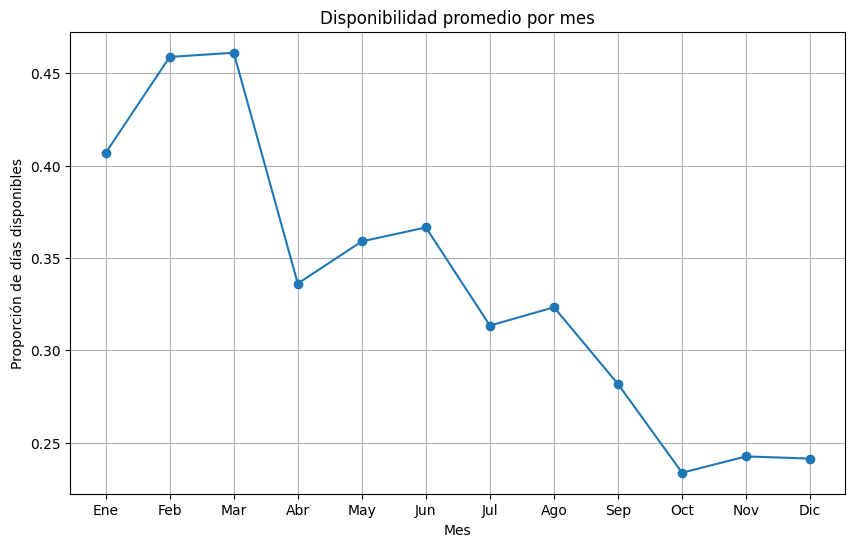

In [ ]:
# Cargar los datos necesarios
calendar = pd.read_csv(
    "C:/Users/Rocio/Desktop/ROCÍO/Todo_rocío/Curso_Data_Analyst/Codes/temario/temario/Informe 2-Upgrade/calendar.csv",
    usecols=['date', 'available'],
    on_bad_lines='skip'
)
calendar['date'] = pd.to_datetime(calendar['date'], errors='coerce')
# Crear columna de mes
calendar['month'] = calendar['date'].dt.month
# Calcular la disponibilidad media por mes
disponibilidad_mensual = calendar.groupby('month')['available'].apply(lambda x: (x == 't').mean())
# Graficar
plt.figure(figsize=(10,6))
plt.plot(disponibilidad_mensual.index, disponibilidad_mensual.values, marker='o')
plt.xticks(range(1,13), ['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic'])
plt.xlabel('Mes')
plt.ylabel('Proporción de días disponibles')
plt.title('Disponibilidad promedio por mes')
plt.grid(True)
plt.show()

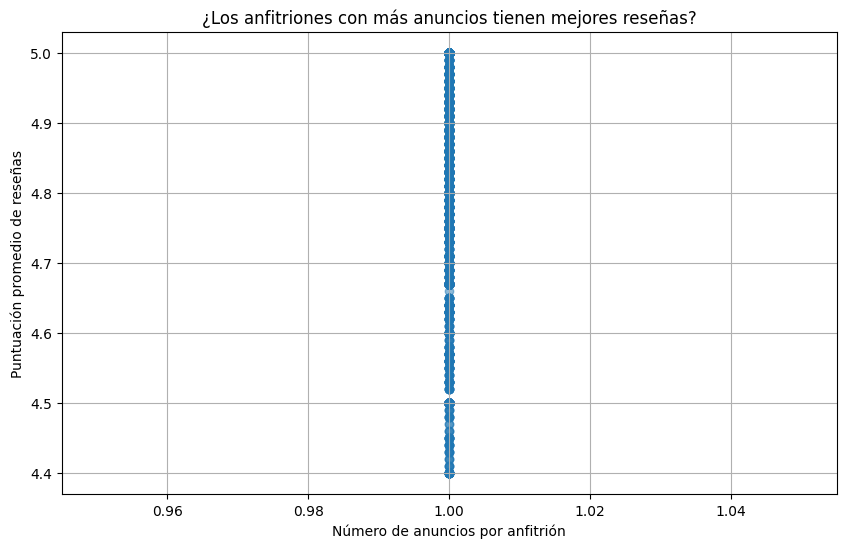

In [ ]:
# Cargar los datos necesarios
listings = pd.read_csv(
    "C:/Users/Rocio/Desktop/ROCÍO/Todo_rocío/Curso_Data_Analyst/Codes/temario/temario/Informe 2-Upgrade/listings.csv",
    usecols=['host_id', 'id', 'review_scores_rating'],
    on_bad_lines='skip'
)
# Eliminar nulos en la puntuación
listings = listings.dropna(subset=['review_scores_rating'])
# Número de anuncios por anfitrión
anuncios_por_host = listings.groupby('host_id')['id'].count().reset_index(name='num_anuncios')
# Promedio de puntuación por anfitrión
rating_por_host = listings.groupby('host_id')['review_scores_rating'].mean().reset_index(name='rating_promedio')
# Unir ambos DataFrames
df_host = pd.merge(anuncios_por_host, rating_por_host, on='host_id')

# Quitar outliers de num_anuncios y rating_promedio usando IQR
for col in ['num_anuncios', 'rating_promedio']:
    Q1 = df_host[col].quantile(0.25)
    Q3 = df_host[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df_host = df_host[(df_host[col] >= limite_inferior) & (df_host[col] <= limite_superior)]

# Gráfico de dispersión
plt.figure(figsize=(10,6))
plt.scatter(df_host['num_anuncios'], df_host['rating_promedio'], alpha=0.5)
plt.xlabel('Número de anuncios por anfitrión')
plt.ylabel('Puntuación promedio de reseñas')
plt.title('¿Los anfitriones con más anuncios tienen mejores reseñas?')
plt.grid(True)
plt.show()